In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
train = pd.read_csv('./train.csv')
train.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [7]:
test=pd.read_csv('./test.csv')
test.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [8]:
train.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [23]:
train['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [24]:
X = train.drop(['Marital status','Application mode','Application order','Target'],axis=1)
y = train['Target']

In [11]:
#undersampling
min_class_count = y.value_counts().min()
train_undersampled = train.groupby('Target').sample(n=min_class_count, random_state=1)

X_undersampled = train_undersampled.drop('Target', axis=1)
y_undersampled = train_undersampled['Target']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_undersampled,y_undersampled,test_size = 0.3,random_state = 1)

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
# Dopout: 0 , Graduate: 2, Enrolled:1

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

rf=RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=1,
    )

start_time = time.time() 
rf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Training runtime: {training_time:.2f} seconds")
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)

Training runtime: 6.10 seconds
Model Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4520
           1       0.70      0.77      0.73      4447
           2       0.79      0.83      0.81      4479

    accuracy                           0.79     13446
   macro avg       0.80      0.79      0.80     13446
weighted avg       0.80      0.79      0.80     13446



In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_classifier = xgb.XGBClassifier()

start_time = time.time() 
xgb_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Training runtime: {training_time:.2f} seconds")
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)

Training runtime: 0.57 seconds
Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      4520
           1       0.72      0.75      0.73      4447
           2       0.80      0.84      0.82      4479

    accuracy                           0.80     13446
   macro avg       0.80      0.80      0.80     13446
weighted avg       0.80      0.80      0.80     13446



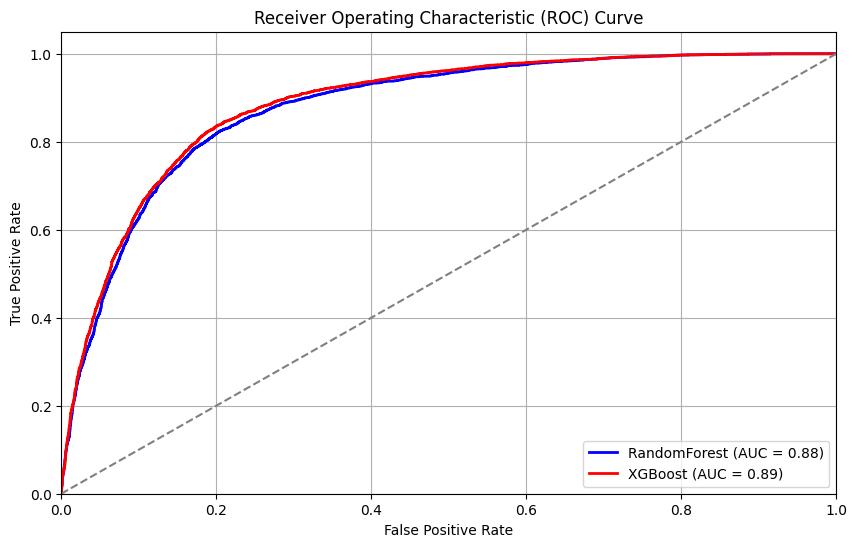

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

rf_pred_proba = rf.predict_proba(X_test)
xgb_pred_proba = xgb_classifier.predict_proba(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba[:, 1], pos_label=1)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba[:, 1], pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RandomForest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

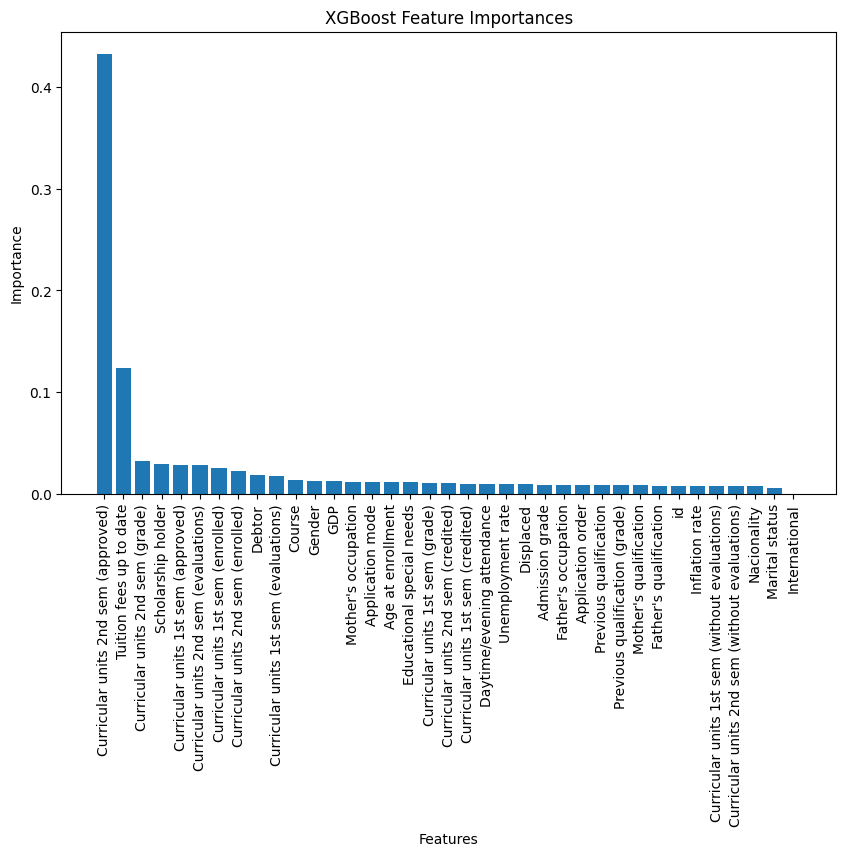

In [17]:
feature_importances_xgb = xgb_classifier.feature_importances_
indices = np.argsort(feature_importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_xgb[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

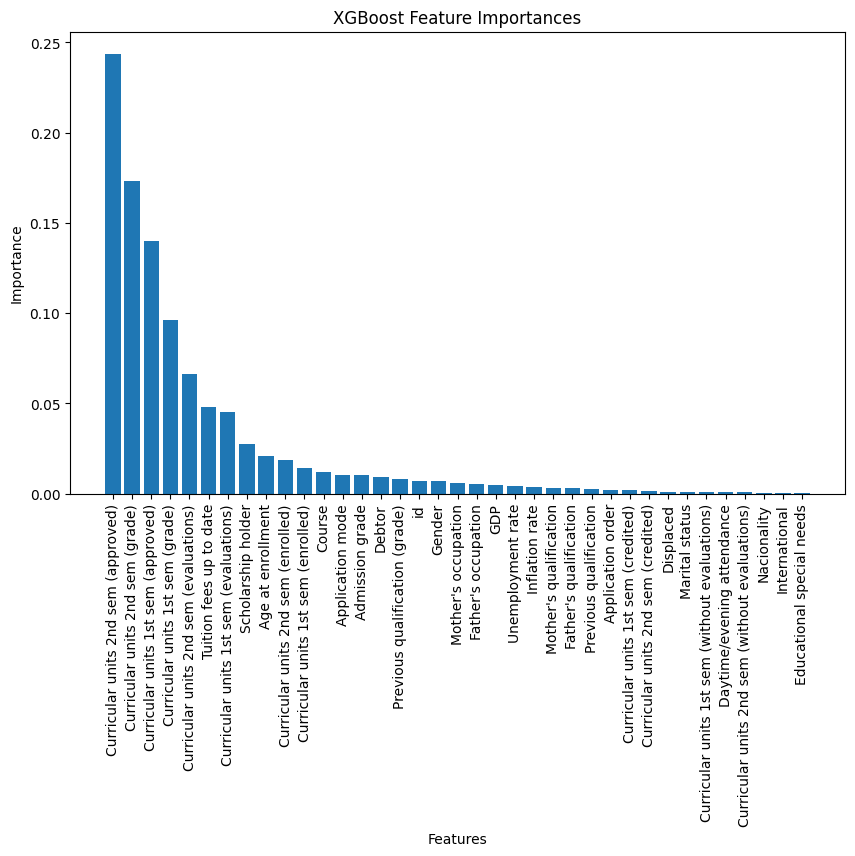

In [18]:
feature_importances_rf = rf.feature_importances_
indices = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_rf[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

In [19]:
y_pred_test = xgb_classifier.predict(test)

In [20]:
ids = test['id']
submission_df = pd.DataFrame({'id': ids, 'Target': y_pred_test})
submission_df.head()

,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1


In [21]:
submission_df['Target'] = submission_df['Target'].apply(lambda x: 'Dropout' if x == 0 else 'Enrolled' if x == 1 else 'Graduate')
submission_df.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [22]:
submission_df.to_csv('submission.csv', index=False)